# PointCloud Symphony

Jupyter notebook to tinker with audio processing and feature extraction.

In [116]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa, numpy as np

Now let's load and visualize an audio sample.

In [117]:
y, sr = librosa.load(librosa.ex("sweetwaltz")) # "nutcracker" is also good
# only take the first 30 seconds
y = y[:sr * 30]

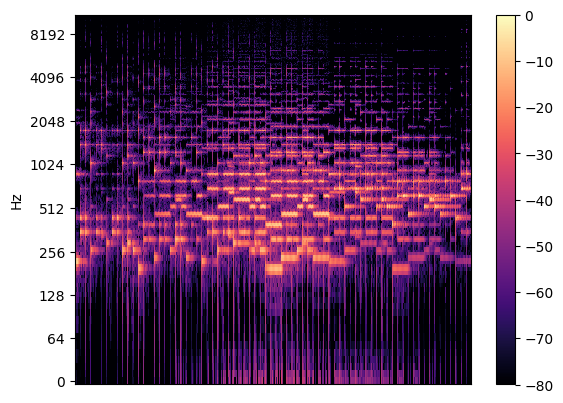

In [118]:
D = librosa.stft(y)

plt.figure()
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(D), ref=np.max),
    y_axis="log")
plt.colorbar()

Audio(data=y, rate=sr)

## Feature Extraction

There are a couple things I would like to extract at each (rough) moment in time. I can get amplitude and frequency (the latter of which is a common thing to graph in 2D audio visualizers), which I can combine to, say, map out where there are drum hits and process them separately from other impulses like notes in a guitar riff. It turns out that this is called "Harmonic/Percussive Source Separation", and librosa has a function for doing this already!

In [119]:
H, P = librosa.decompose.hpss(D)
harmonic_y = librosa.istft(H)
percussive_y = librosa.istft(P)

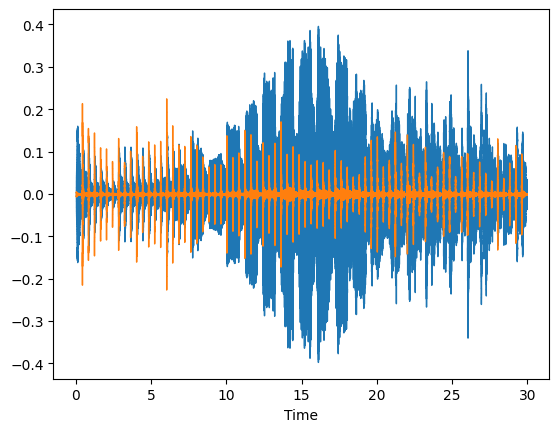

In [120]:
librosa.display.waveshow(harmonic_y)
librosa.display.waveshow(percussive_y)
# harmonic in blue, percussive in orange

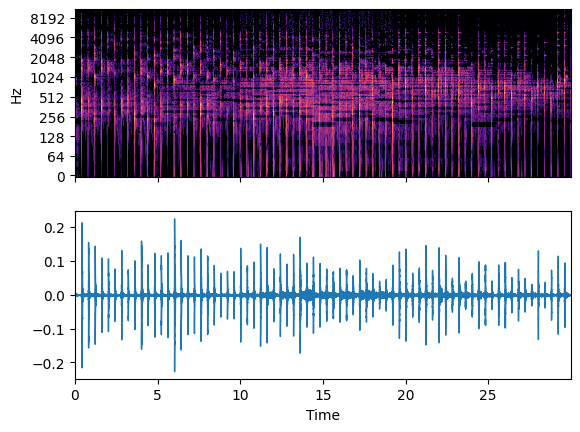

In [121]:
# creating two plots
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max), y_axis="log", x_axis="time", ax=ax1)
# hide reduntant time label
ax1.set_xlabel(None)

librosa.display.waveshow(percussive_y, ax=ax2)

Audio(data=percussive_y, rate=sr)